In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import metrics 
import numpy as np
from Convert import convert_to_dataframe

In [2]:
iris = convert_to_dataframe(load_iris())

In [3]:
iris.sample(20)

,sepallength,sepalwidth,petallength,petalwidth,target
115,6.4,3.2,5.3,2.3,virginica
79,5.7,2.6,3.5,1.0,versicolor
47,4.6,3.2,1.4,0.2,setosa
96,5.7,2.9,4.2,1.3,versicolor
103,6.3,2.9,5.6,1.8,virginica
22,4.6,3.6,1.0,0.2,setosa
19,5.1,3.8,1.5,0.3,setosa
108,6.7,2.5,5.8,1.8,virginica
5,5.4,3.9,1.7,0.4,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [4]:
X = iris.drop(['target'], axis=1)
Y = iris['target']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [19]:
X_train

,sepallength,sepalwidth,petallength,petalwidth
12,4.8,3.0,1.4,0.1
138,6.0,3.0,4.8,1.8
87,6.3,2.3,4.4,1.3
15,5.7,4.4,1.5,0.4
73,6.1,2.8,4.7,1.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
0,5.1,3.5,1.4,0.2
91,6.1,3.0,4.6,1.4
66,5.6,3.0,4.5,1.5


In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf = clf.fit(X_train, Y_train)

[Text(0.4444444444444444, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 43, 37]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 1.75\ngini = 0.497\nsamples = 80\nvalue = [0, 43, 37]'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7777777777777778, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.6666666666666666, 0.083333333333333

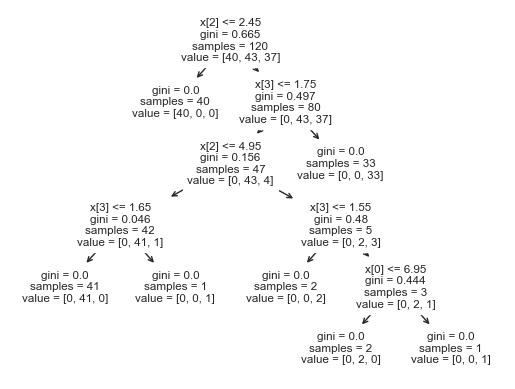

In [22]:
tree.plot_tree(clf)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
Y_test_ind = Y_test.reset_index()
print(pd.concat([Y_test_ind, pd.DataFrame({"y_pred":y_pred})], axis=1))

    index      target      y_pred
0     130   virginica   virginica
1     134   virginica   virginica
2      46      setosa      setosa
3      82  versicolor  versicolor
4     121   virginica   virginica
5      19      setosa      setosa
6      43      setosa      setosa
7      23      setosa      setosa
8      34      setosa      setosa
9     141   virginica   virginica
10     13      setosa      setosa
11    108   virginica   virginica
12    147   virginica   virginica
13    149   virginica   virginica
14    123   virginica   virginica
15     39      setosa      setosa
16     45      setosa      setosa
17    109   virginica   virginica
18     51  versicolor  versicolor
19     89  versicolor  versicolor
20     88  versicolor  versicolor
21     70  versicolor   virginica
22    114   virginica   virginica
23    136   virginica   virginica
24     62  versicolor  versicolor
25     30      setosa      setosa
26     56  versicolor  versicolor
27    117   virginica   virginica
28      9     

In [25]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.86      0.92         7
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
print("Confusion matrix:")
print(metrics.confusion_matrix(Y_test, y_pred, labels=['setosa', 'versicolor', 'verginica']))

Confusion matrix:
[[10  0  0]
 [ 0  6  0]
 [ 0  0  0]]


In [27]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred)*100)

Accuracy: 96.66666666666667


In [28]:
my_features = [[5.5,3.5,1.3,0.2]]
prediction = clf.predict(my_features)
print(prediction)

['setosa']


C:\Users\attri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
